# Example Script for `plot_helper` Function

## Import

In [1]:
import copy
from datetime import datetime as D
from datetime import timedelta as TD

import numpy as np
import matplotlib.dates as mdates

from plot_helper import single_plotter

## Generate Data

In [2]:
random_seed = 42
all_index_range = 220   # * length of demonstration data
time_index = True      # * Whether to use time index or not

x_index = np.array(range(all_index_range))
x_label = "Index"
x_time_start = D(year=2000, month=1, day=1, hour=0, minute=0, second=0)
x_index_time = np.array([x_time_start + idx * TD(seconds=5) for idx in x_index])
x_label_time = "Day Hour:Minute"

rng = np.random.default_rng(seed=random_seed)

# * Generate random walk data for plotting.
y1 = np.cumsum(rng.normal(loc=0, scale=1, size=all_index_range))
y2 = np.cumsum(rng.normal(loc=0, scale=1, size=all_index_range))
y3 = 10 + np.cumsum(rng.normal(loc=0, scale=10, size=all_index_range))
y3_2 = 10 + np.cumsum(rng.normal(loc=0, scale=10, size=all_index_range))
y4 = 50 + np.cumsum(rng.normal(loc=0, scale=50, size=all_index_range))
y5 = 0.2 + np.cumsum(rng.normal(loc=0, scale=0.2, size=all_index_range))

# * Generate exponentially changing data for illustrating other style plot
yexp1 = np.exp(-x_index)
yexp2 = 0.8 * np.exp(-x_index) + 0.2 + rng.normal(loc=0, scale=0.02, size=all_index_range)

## Single-subplot Figures

The following code shows what each keyword is used for and some plot types
supported by `single_plotter` function. The first type is the `curve` which
corresponds to `matplotlib.pyplot.plot` function.

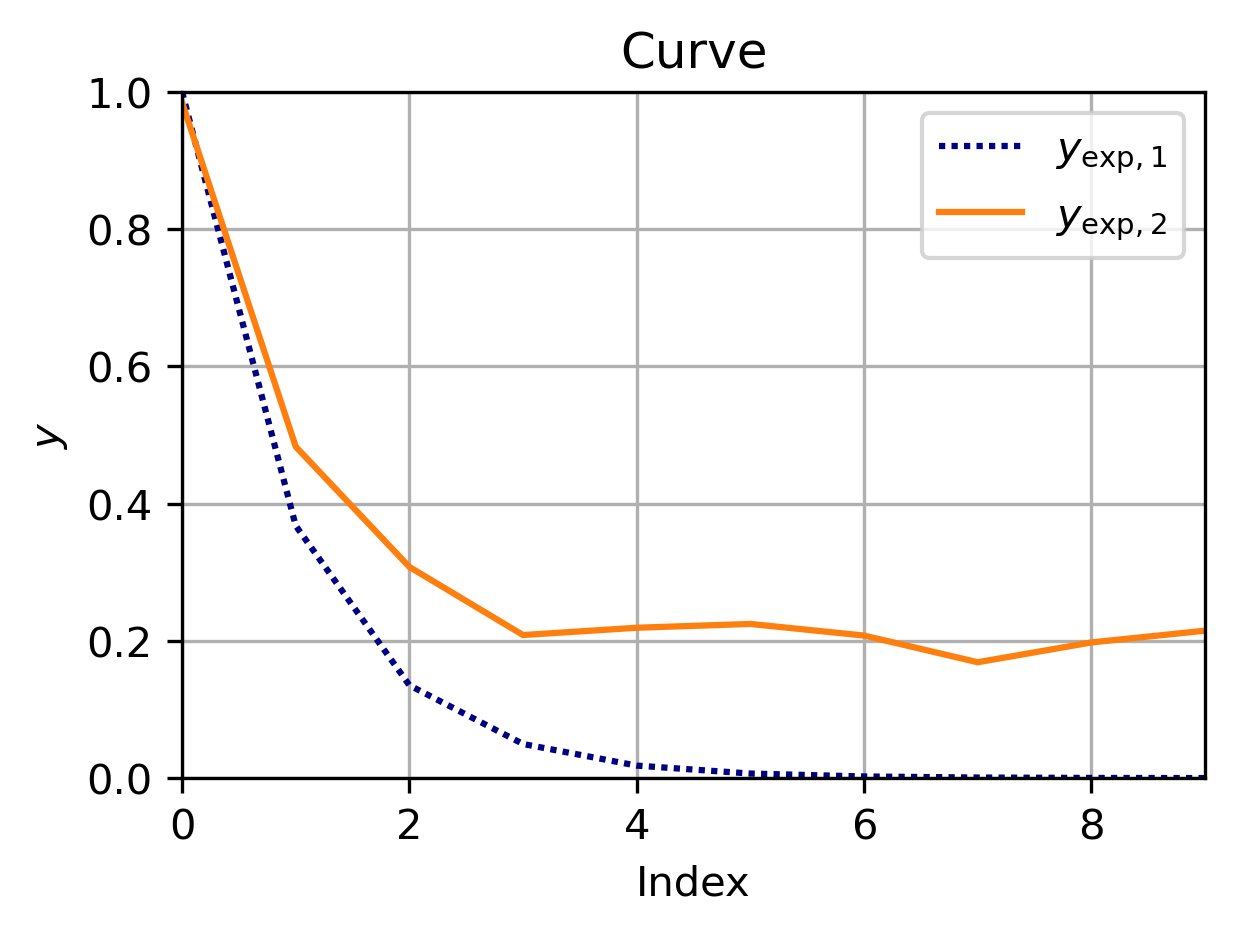

In [3]:
curve_plot_list = [
    {
        # * Title is optional.  
        "title": "Curve",
        # * xlabel is optional. Same as `matplotlib` attribute.
        "xlabel": x_label[:10],
        # * xlim is optional. One may use array-like or dict to specify
        # * xlim, same as `matplotlib` attribute. Only one setting of x-lim
        # * is available for a single subplot.
        # "xlim": {"bottom": x_index[0]},  # * Can also use dict-style settings
        "xlim": np.array([x_index[0], x_index[9]]),
        "yaxes":[ # * "yaxes" list defines all y-axes in a subplot
            {
                # * ylabel is optional. Same as `matplotlib` attribute.
                "ylabel": "$y$", 
                # * For each y-axis, multiple lines can be attached to by adding
                # * line defining dicts into the "lines" list.  
                "lines": [
                    # * Curves/scatters/etc. will be plotted in the order as
                    # * appeared in "lines" list.
                    {
                    # * Will call functions supported by `matplotlib.pyplot`
                    # * by the name defined under keyword "type". Specially, 
                    # * the "curve" type will call `matplotlib.pyplot.plot`,
                    "type": "curve", 
                    # * Insert your x-axis data under the "x" key and y-axis
                    # * data under the "y" key. These data will be directly
                    # * transferred into the `matplotlib` functions so any
                    # * types of data supported by `matplotlib` are also
                    # * supported here.
                    "x": x_index[:10],       # * "x" is optional
                    "y": yexp1[:10],         # * "y" is necessary
                    # * Setting terms in "spec" dict will be used to configure
                    # * the line, same keyword arguments as the plot functions
                    # * of `matplotlib`. "spec" is optional.
                    "spec": {"label": "$y_{\mathrm{exp},1}$", "c": "navy", 
                            "linestyle": (0, (1, 1)) # * 'densely dotted'
                            }
                    },
                    {"type": "curve", "x": x_index[:10], "y": yexp2[:10], 
                    "spec": {"label": "$y_{\mathrm{exp},2}$", "c": "tab:orange",}
                    },
                ],
                # * "legend" is optional, but if specified, "visible" and "loc" 
                # * keywords are necessary; "loc" keyword can be left as None.
                # * If not specified, a single legend will be automatically
                # * generated for the **whole subplot** instead of multiple legends
                # * for each axis. The specification of the legend for the
                # * **first** y-axis will determine the behavior of legend for the
                # * whole subplot, and the specifications of the rest y-axes will
                # * be **ignored**. To hide the legend, specify the "visible" of
                # * the legend for the first y-axis as False. One may adjust the 
                # * position of legend using "loc" (usage the same as the keyword
                # * in `matplotlib`) or leave it None (`matplotlib` will 
                # * automatically adjust the position of legend).
                "legend": {"visible": True, "loc": "upper right",},
                # * "grid" is optional
                # * One may specify the grid behavior using the "grid" dict. Usage
                # * the same as `grid` attribute in `matplotlib`. 
                "grid": {"which": "both", "axis": "both",},
                # * ylim is optional. One may use list-like or dict to specify
                # * ylim, same as "xlim"
                # "ylim": {"bottom": 0},  # * Can also use dict-style settings
                "ylim": np.array([0, 1]),
            }
        ],
    }
]
# * Call the single_plotter to generate figure
fig_curve, xaxeslist_curve = single_plotter(curve_plot_list, figsizeheight=1.5, figsizewidth=2)
# * If you want to adjust the x-axes of each subplot, you may use
# * xaeslist to adjust them.

The `"type"` keyword `"plot"` is the same as the keyword `"curve"`. You can
hide the subplot legend by setting `y_axis_dict["legend"]["visible"] = False`

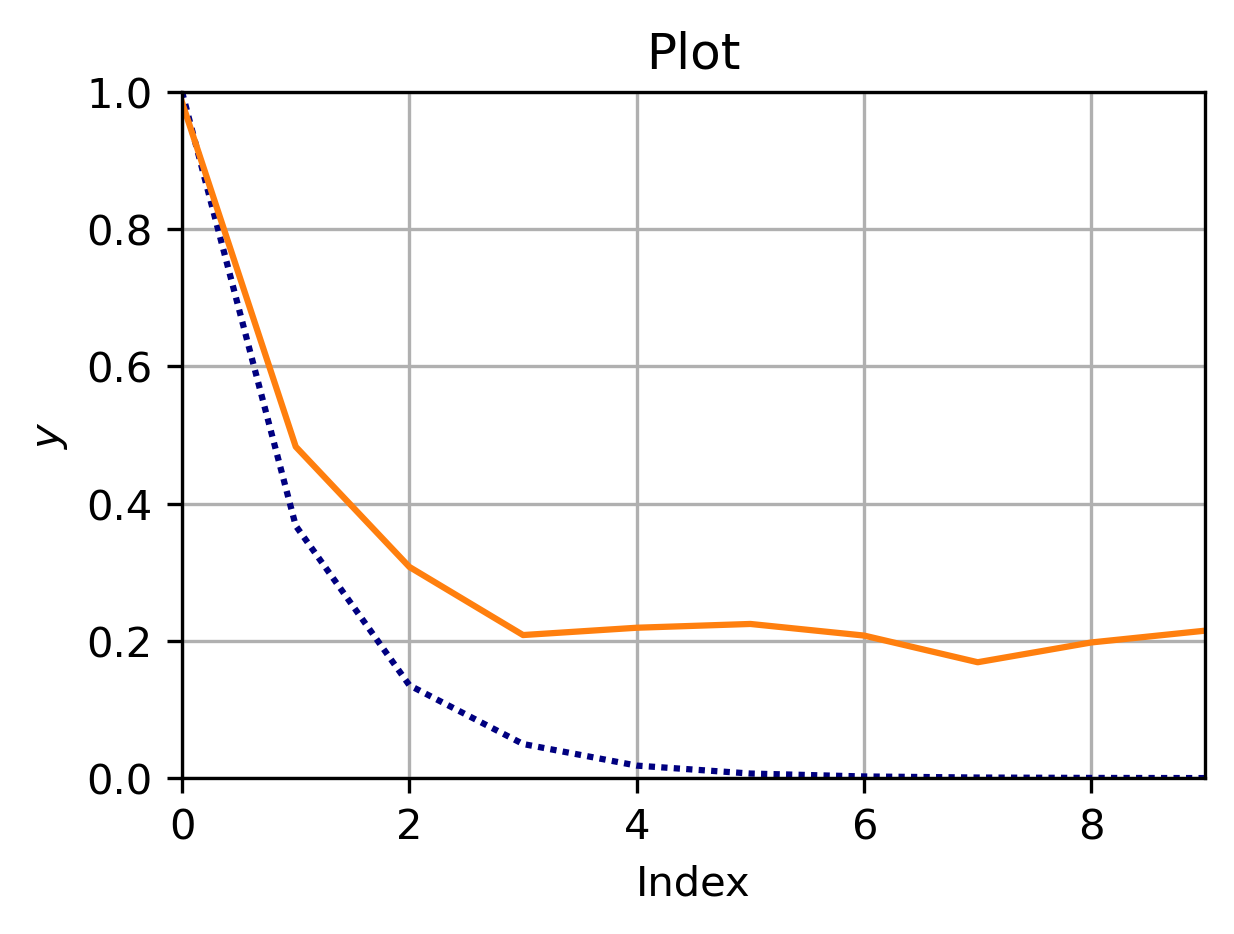

In [5]:
plot_plot_list = copy.deepcopy(curve_plot_list)  
plot_plot_list[0]["title"] = "Plot"
for line_dict in plot_plot_list[0]["yaxes"][0]["lines"]:
    line_dict["type"] = "plot"
plot_plot_list[0]["yaxes"][0]["legend"]["visible"] = False
fig_plot, xaxeslist_plot = single_plotter(plot_plot_list, figsizeheight=1.5, figsizewidth=2)

Change the `"type"` keyword to `"scatter"` will give the scatter plot, and
change it to `"semilogy"` will give a semi-log-y-scale plot.

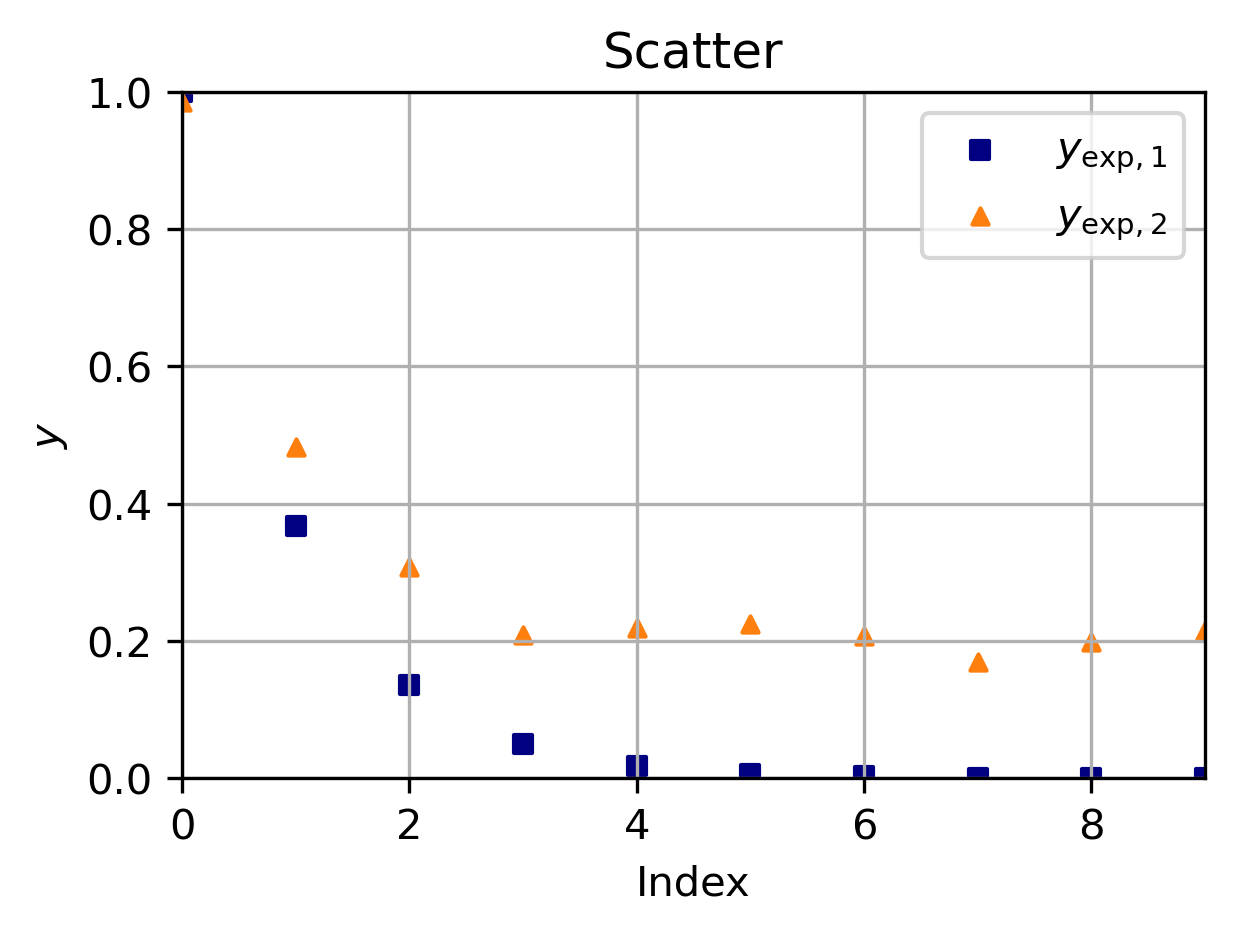

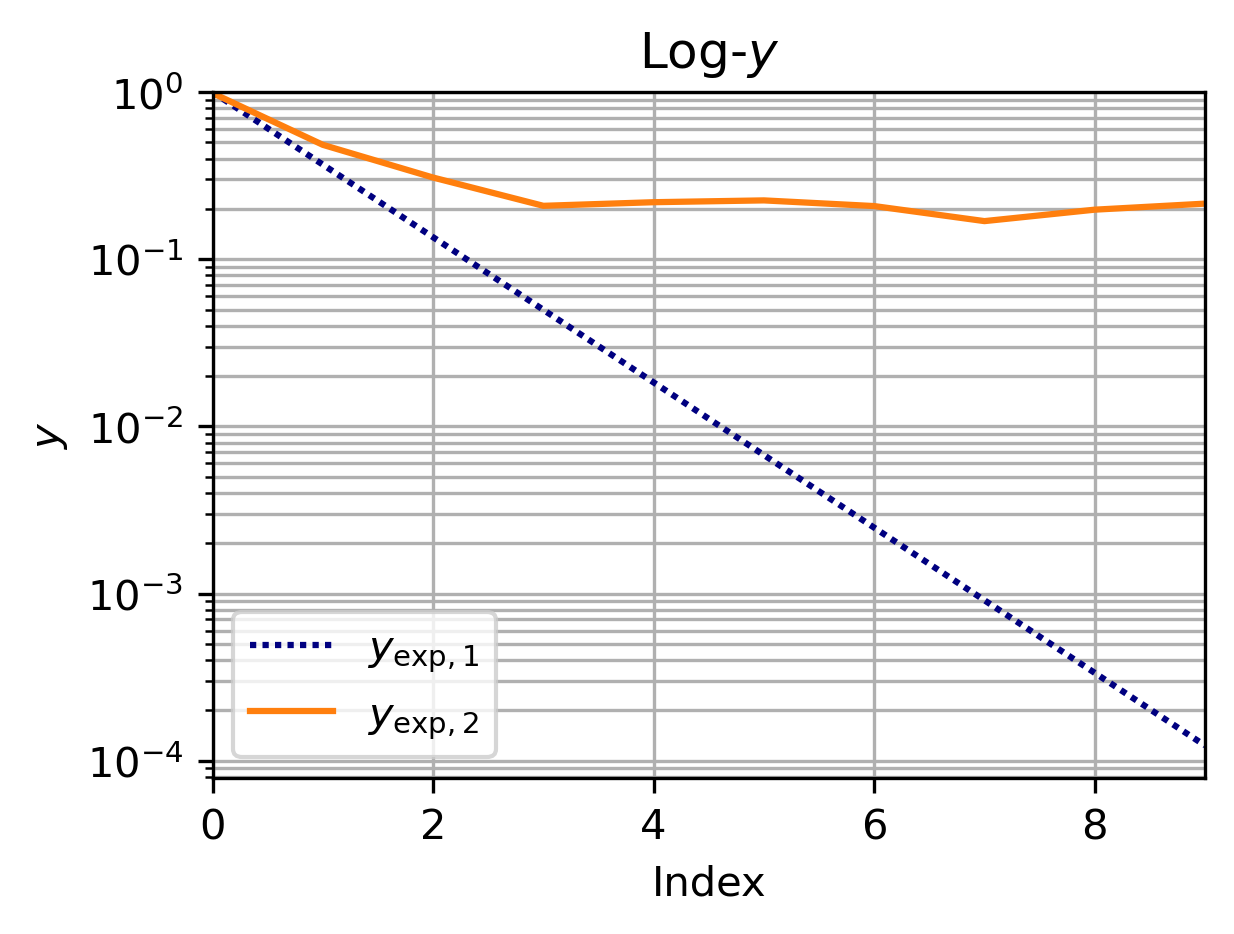

In [6]:
scatter_plot_list = copy.deepcopy(curve_plot_list)  
scatter_plot_list[0]["title"] = "Scatter"
for line_dict in scatter_plot_list[0]["yaxes"][0]["lines"]:
    line_dict["type"] = "scatter"
# * Note that scatter plot uses different spec settings from curve plot
scatter_plot_list[0]["yaxes"][0]["lines"][0]["spec"] = {"label": "$y_{\mathrm{exp},1}$", 
                        "c": "navy", "marker": "s", "s": 20}
scatter_plot_list[0]["yaxes"][0]["lines"][1]["spec"] = {"label": "$y_{\mathrm{exp},2}$", 
                        "c": "tab:orange", "marker": "^", "s": 15}
fig_scatter, xaxeslist_scatter = single_plotter(scatter_plot_list, figsizeheight=1.5, figsizewidth=2)


logy_plot_list = copy.deepcopy(curve_plot_list)  
logy_plot_list[0]["title"] = "Log-$y$"
for line_dict in logy_plot_list[0]["yaxes"][0]["lines"]:
    line_dict["type"] = "semilogy"
# * replace legend position
logy_plot_list[0]["yaxes"][0]["legend"] = {"visible": True, "loc": None,}
# * for log-y plot, ylim needs to be adjusted
logy_plot_list[0]["yaxes"][0]["ylim"] ={"top": 1}
fig_logy, xaxeslist_logy = single_plotter(logy_plot_list, figsizeheight=1.5, figsizewidth=2)

Note that even in this case we only have one axis for each figure, the axes
arrays returned by single_plotter (i.e., the
`xaxeslist_curve`, `xaxeslist_plot`, `xaxeslist_scatter`, `xaxeslist_logy` etc.)
are all `np.ndarray` instead of `plt.Axes`, which is different from that
returned by `matplotlib.pyplot.subplots` function. This design is for the
convenience of iteration.

In [7]:
print(type(xaxeslist_curve), f", shape={xaxeslist_curve.shape}")
print(type(xaxeslist_plot), f", shape={xaxeslist_plot.shape}")
print(type(xaxeslist_scatter), f", shape={xaxeslist_scatter.shape}")
print(type(xaxeslist_logy), f", shape={xaxeslist_logy.shape}")

<class 'numpy.ndarray'> , shape=(1,)
<class 'numpy.ndarray'> , shape=(1,)
<class 'numpy.ndarray'> , shape=(1,)
<class 'numpy.ndarray'> , shape=(1,)


You may add multiple y-axis dicts for a single subplots. The first
y axis will be automatically
selected as the main axis of the subplot on the left hand side.
The rest axes will become the minor axes, appearing on the right hand side in
the order as defined in the `"yaxes"` list. You may control the interval among
y-axes. By default it is 0.2.

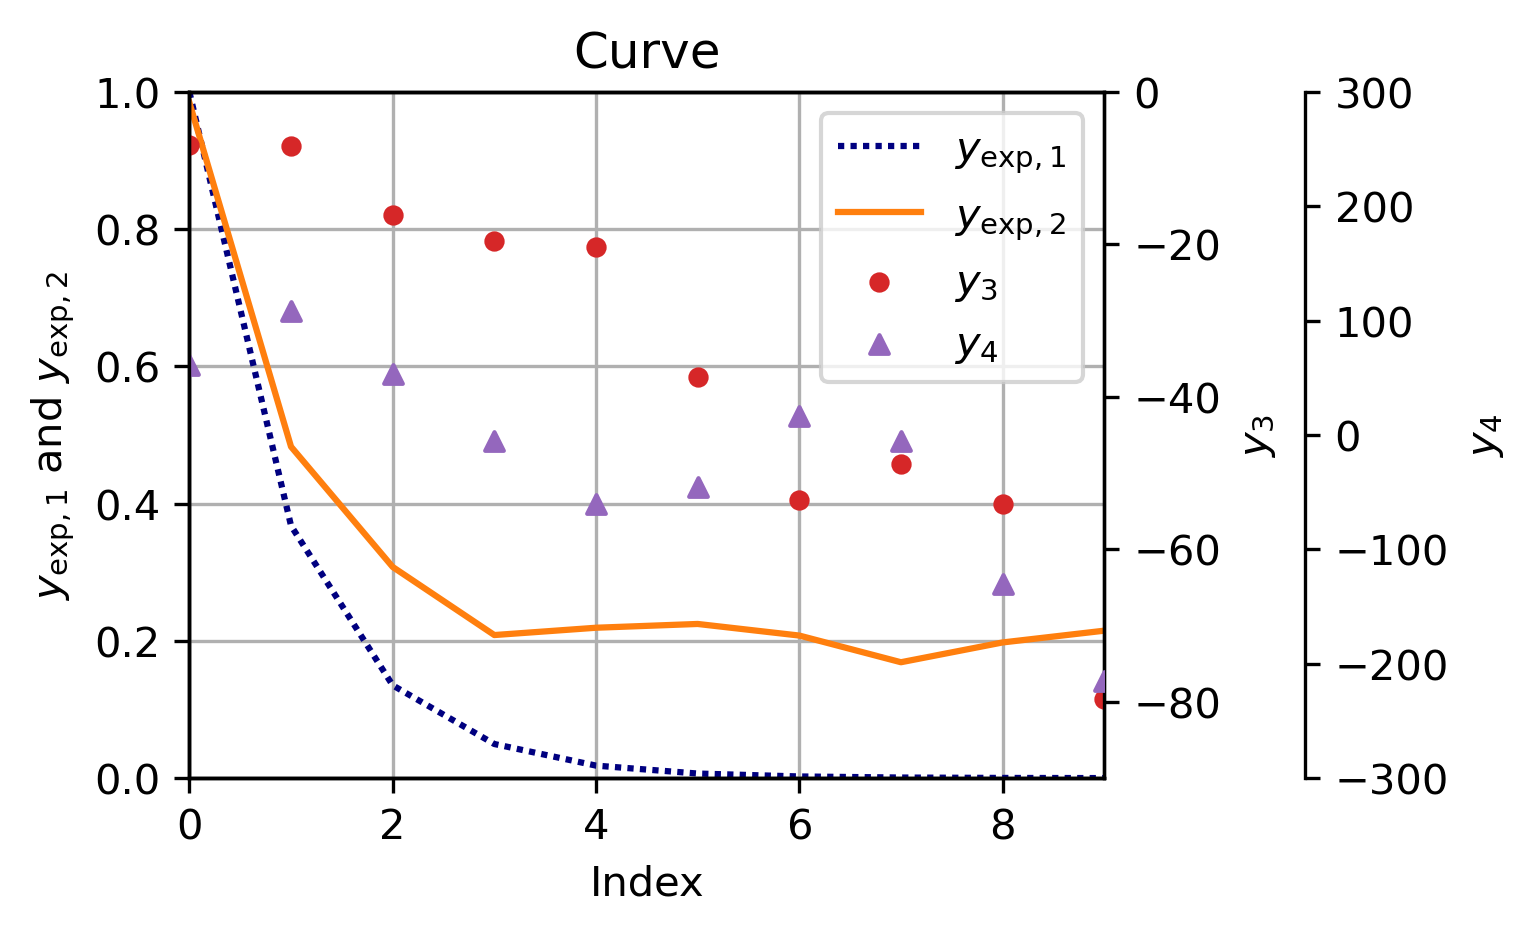

In [8]:
multiy_plot_list = copy.deepcopy(curve_plot_list)
multiy_plot_list[0]["yaxes"][0]["legend"]["loc"] = "upper right"
multiy_plot_list[0]["yaxes"][0]["ylabel"] = "$y_{\mathrm{exp},1}$ and $y_{\mathrm{exp},2}$"
multiy_plot_list[0]["yaxes"].append(
    {"ylabel": "$y_{3}$", 
    "lines": [{ # * different types can exist in a single subplot
            "type": "scatter", "x": x_index[:10], "y": y3_2[:10],
            "spec": {"label": "$y_{3}$", "c": "tab:red", "marker": "o", "s": 15}
            },
        ],
        # * Just for demonstration. This "legend" setting will be ignored
        #* as it belongs to the right y-axis.
        "legend": {"visible": True, "loc": "upper left",},
        # * You may plot grids for all y-axes if you like. Here I only keep
        # * the grid for left y-axis.
        # "grid": {"which": "both", "axis": "both",},
        "ylim": np.array([-90, 0]),
    }
)
multiy_plot_list[0]["yaxes"].append(
    {"ylabel": "$y_{4}$", 
    "lines": [{ # * different types can exist in a single subplot
            "type": "scatter", "x": x_index[:10], "y": y4[:10],
            "spec": {"label": "$y_{4}$", "c": "tab:purple", "marker": "^", "s": 20}
            },
        ],
        # * Just for demonstration. This "legend" setting will be ignored
        #* as it belongs to the right y-axis.
        "legend": {"visible": True, "loc": "lower left",},
        "ylim": np.array([-300, 300]),
    }
)
fig_multiy, xaxeslist_multiy = single_plotter(multiy_plot_list, 
                                    figsizeheight=1.5, 
                                    figsizewidth=2.5,
        # * you may control the interval among y-axes. By default it is 0.2 
                                    right_yaxis_interval=0.22,
                                )

## Single-column Figures with Multiple Subplots

The following code will create a figure with single column of subplots.
In this case, the returned `xaxeslist` of `single_plotter` will be a 1D
`np.ndarray`.

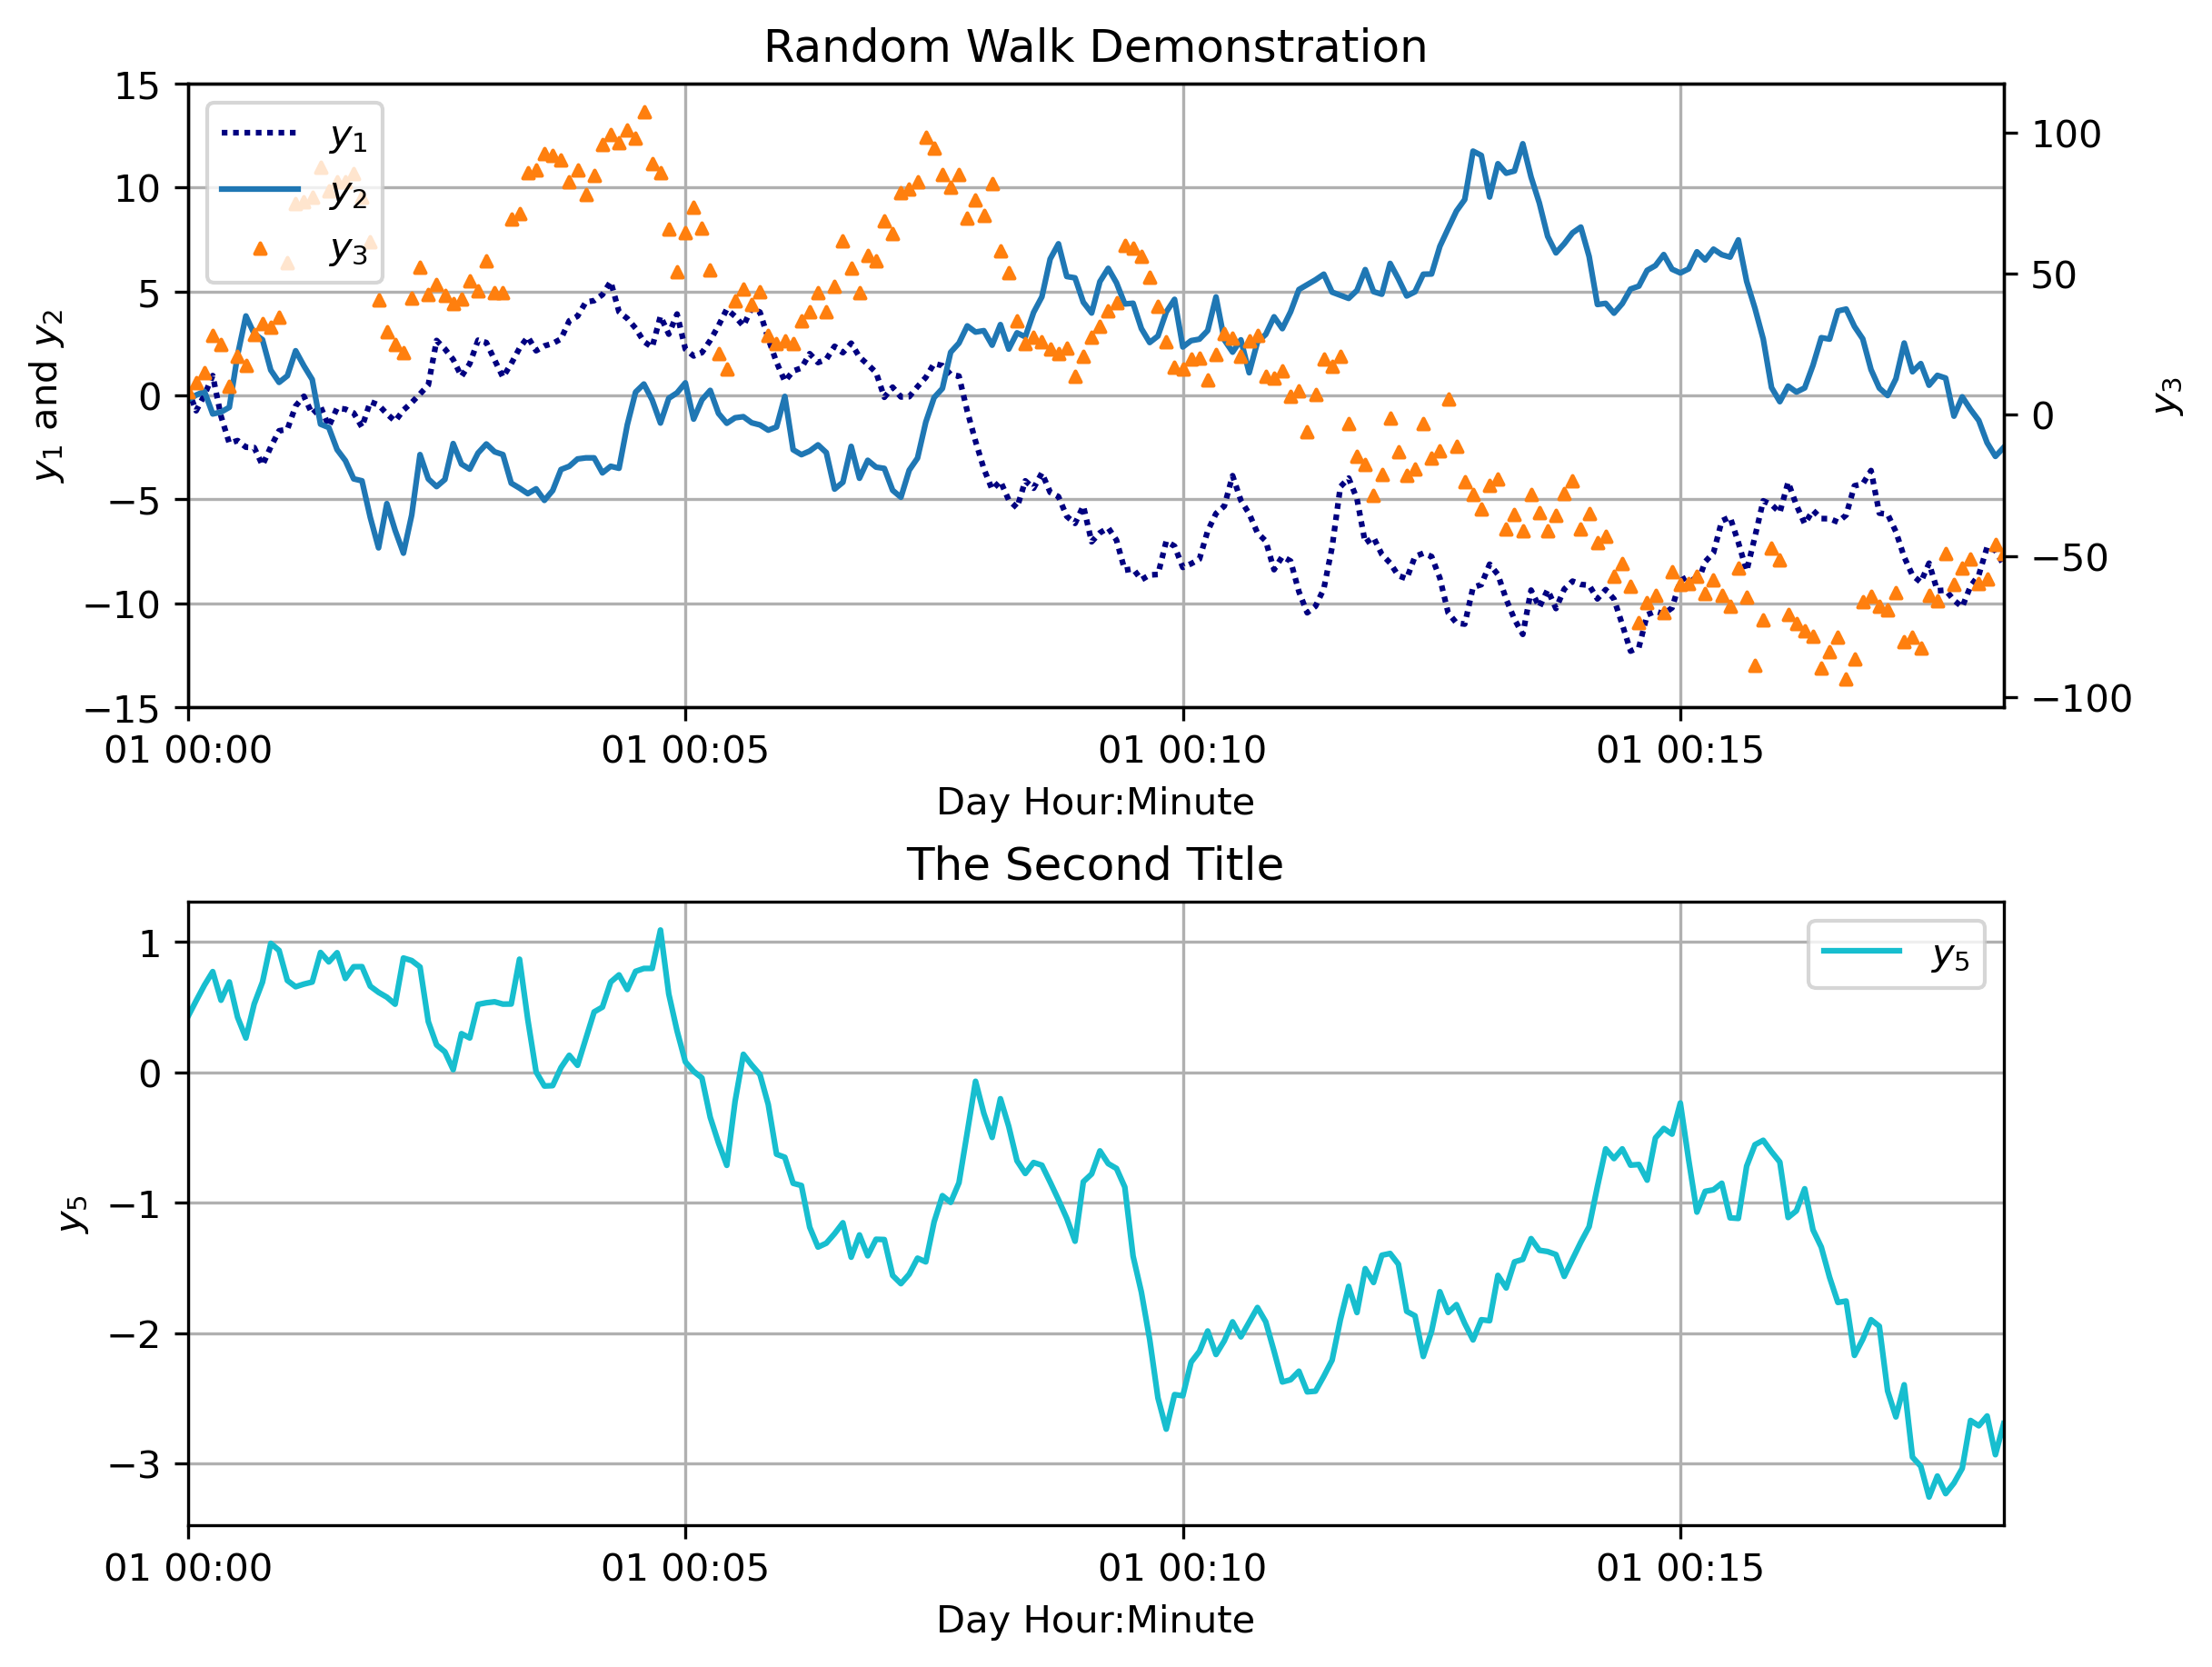

In [9]:
all_plot_settings_list = [
    {   # * The first subplot of the figure
        "title": "Random Walk Demonstration", 
        "xlabel": x_label_time,
        "xlim": np.array([x_index_time[0], x_index_time[-1]]),
        "yaxes": [
            {  # & y1 and y2
                "ylabel": "$y_{1}$ and $y_{2}$", 
                "lines": [
                    {"type": "curve", "x": x_index_time, "y": y1,
                    "spec": {"label": "$y_{1}$", "c": "navy", "linestyle": (0, (1, 1))}}, # * 'densely dotted'
                    {"type": "curve", "x": x_index_time, "y": y2, 
                    "spec": {"label": "$y_{2}$", "c": "tab:blue",}},
                ],
                "legend": {"visible": True, "loc": "upper left",},
                "grid": {"which": "both", "axis": "both",},
                "ylim": np.array([-15, 15]),
            },
            {  # & y3
                "ylabel": "$y_{3}$", "lines": [
                    {"type": "scatter", "x": x_index_time, "y": y3,
                    "spec": {"label": "$y_{3}$", "c": "tab:orange", "marker": "^", "s": 8}},
                ],       
            },
        ]
    },
    {   # * The second subplot of the figure
        # * One may define a separate title for each subplot if needed.
        "title": "The Second Title", "xlabel": x_label_time, 
        "xlim": np.array([x_index_time[0], x_index_time[-1]]), "yaxes": [
            {  # & y5
                "ylabel": "$y_{5}$", "grid": {"which": "both", "axis": "both",},
                "legend": {"visible": True, "loc": None,},
                "lines": [
                    {"type": "curve", "x": x_index_time, "y": y5,
                    "spec": {"label": "$y_{5}$", "c": "tab:cyan",}},
                ],       
            },
        ]
    },
]
# * Call the single_plotter to generate figure
fig, xaxeslist = single_plotter(all_plot_settings_list, figsizeheight=3)
# * If you want to adjust the x-axes of each subplot, you may use
# * xaeslist to adjust them. Here since we only have one column of subplots,
# * we can directly iterate over returned xaxeslist
for ax in xaxeslist:
    # * Here I specify the time format as '%d %H:%M'
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))

## Multi-column Figures

To have multi-column figures plotted, you have to create a 2D `np.ndarray` or
python `list` (essentially the list of lists) of subplots. Note that if you
use python `list` to represent the subplot, each 1D sub-list represents 
a **row** (not a column) of subplots and **each sub-list must be of the**
**the same length**. If you don't need subplots at some position,
you have to use `None` or an empty dict `{}` to occupy that position. 

`single_plotter` function does not support 3D and higher dimensional array-like
structures, if passed in an error will be raised.

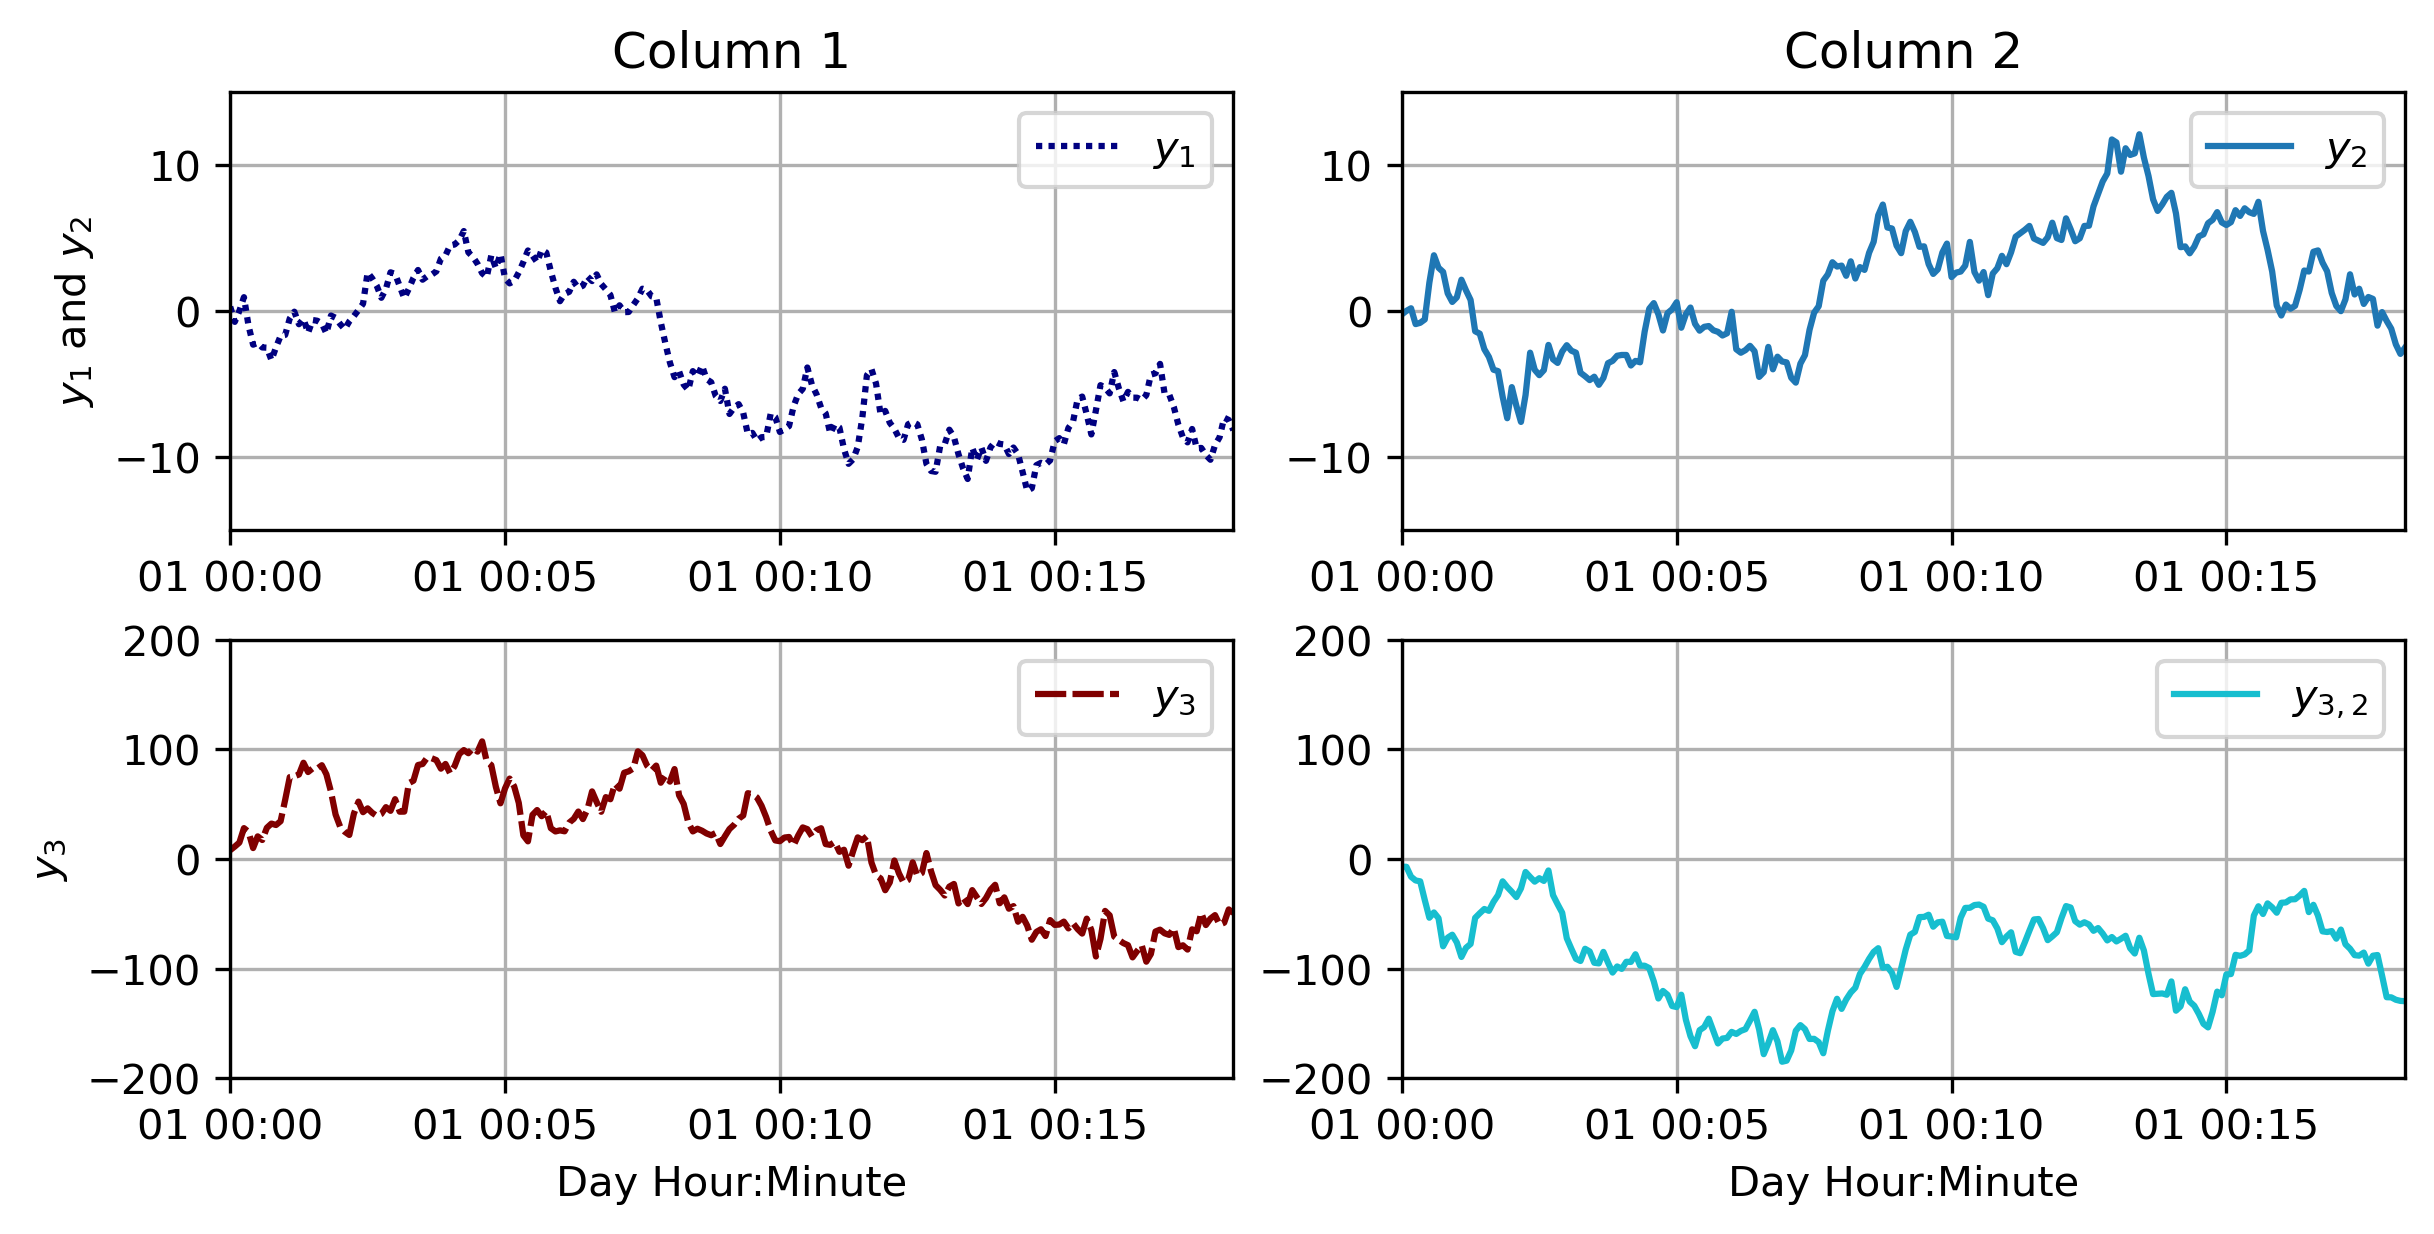

In [15]:
upper_row_list = [
    {  
        "title": "Column 1", 
        "xlim": np.array([x_index_time[0], x_index_time[-1]]),
        "yaxes": [
            {  # & y1 and y2
                "ylabel": "$y_{1}$ and $y_{2}$", 
                "lines": [
                    {"type": "curve", "x": x_index_time, "y": y1,
                    "spec": {"label": "$y_{1}$", "c": "navy", "linestyle": (0, (1, 1))}}, # * 'densely dotted'
                    
                ],
                "legend": {"visible": True, "loc": None,},
                "grid": {"which": "both", "axis": "both",},
                "ylim": np.array([-15, 15]),
            },
        ]
    },
    {   # * The second subplot of the figure
        "title": "Column 2", 
        "xlim": np.array([x_index_time[0], x_index_time[-1]]), "yaxes": [
            {  # & y5
                "grid": {"which": "both", "axis": "both",},
                "legend": {"visible": True, "loc": None,},
                "lines": [
                    {"type": "curve", "x": x_index_time, "y": y2, 
                    "spec": {"label": "$y_{2}$", "c": "tab:blue",}},
                ],
                "ylim": np.array([-15, 15]),
            },
        ]
    },
]
lower_row_list = [
    {  
        # "title": "Column 1", 
        "xlabel": x_label_time,
        "xlim": np.array([x_index_time[0], x_index_time[-1]]),
        "yaxes": [
            {  # & y3
                "ylabel": "$y_{3}$", "xlabel": x_label_time,
                "lines": [
                    {"type": "curve", "x": x_index_time, "y": y3, 
                    "spec": {"label": "$y_{3}$", "c": "maroon", "linestyle": (0, (5, 1))}},
                ],
                "legend": {"visible": True, "loc": None,},
                "grid": {"which": "both", "axis": "both",},
                "ylim": np.array([-200, 200]), 
            },
        ]
    },
    {   # * The second subplot of the figure
        # "title": "Column 2", 
        "xlabel": x_label_time,
        "xlim": np.array([x_index_time[0], x_index_time[-1]]), "yaxes": [
            {  # & y3_2
                "grid": {"which": "both", "axis": "both",},
                "legend": {"visible": True, "loc": None,},
                "lines": [
                    {"type": "curve", "x": x_index_time, "y": y3_2,
                    "spec": {"label": "$y_{3,2}$", "c": "tab:cyan",}},
                ],
                "ylim": np.array([-200, 200]), 
            },
        ]
    },
]
whole_list = [upper_row_list, lower_row_list]

# * If you want to specify the figure by columns, you could first use np.empty 
# * to create the whole array and then specify the columns using single 
# * sub-lists as follows:
# whole_list = np.empty(shape=(2, 2),dtype=object,)
# whole_list[:, 0] = your_left_col_list    # * the 1st column
# whole_list[:, 1] = your_right_col_list   # * the 2nd column

# * Call the single_plotter to generate figure
fig, xaxeslist = single_plotter(whole_list)
for ax in xaxeslist.flat:   # * now we have multi-rows so we need to flatten
                            # * the xaxeslist to iterate.
    # * Here I specify the time format as '%d %H:%M'
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))

If you don't want some subplot, you need to replace that position with `None`
or `{}`.

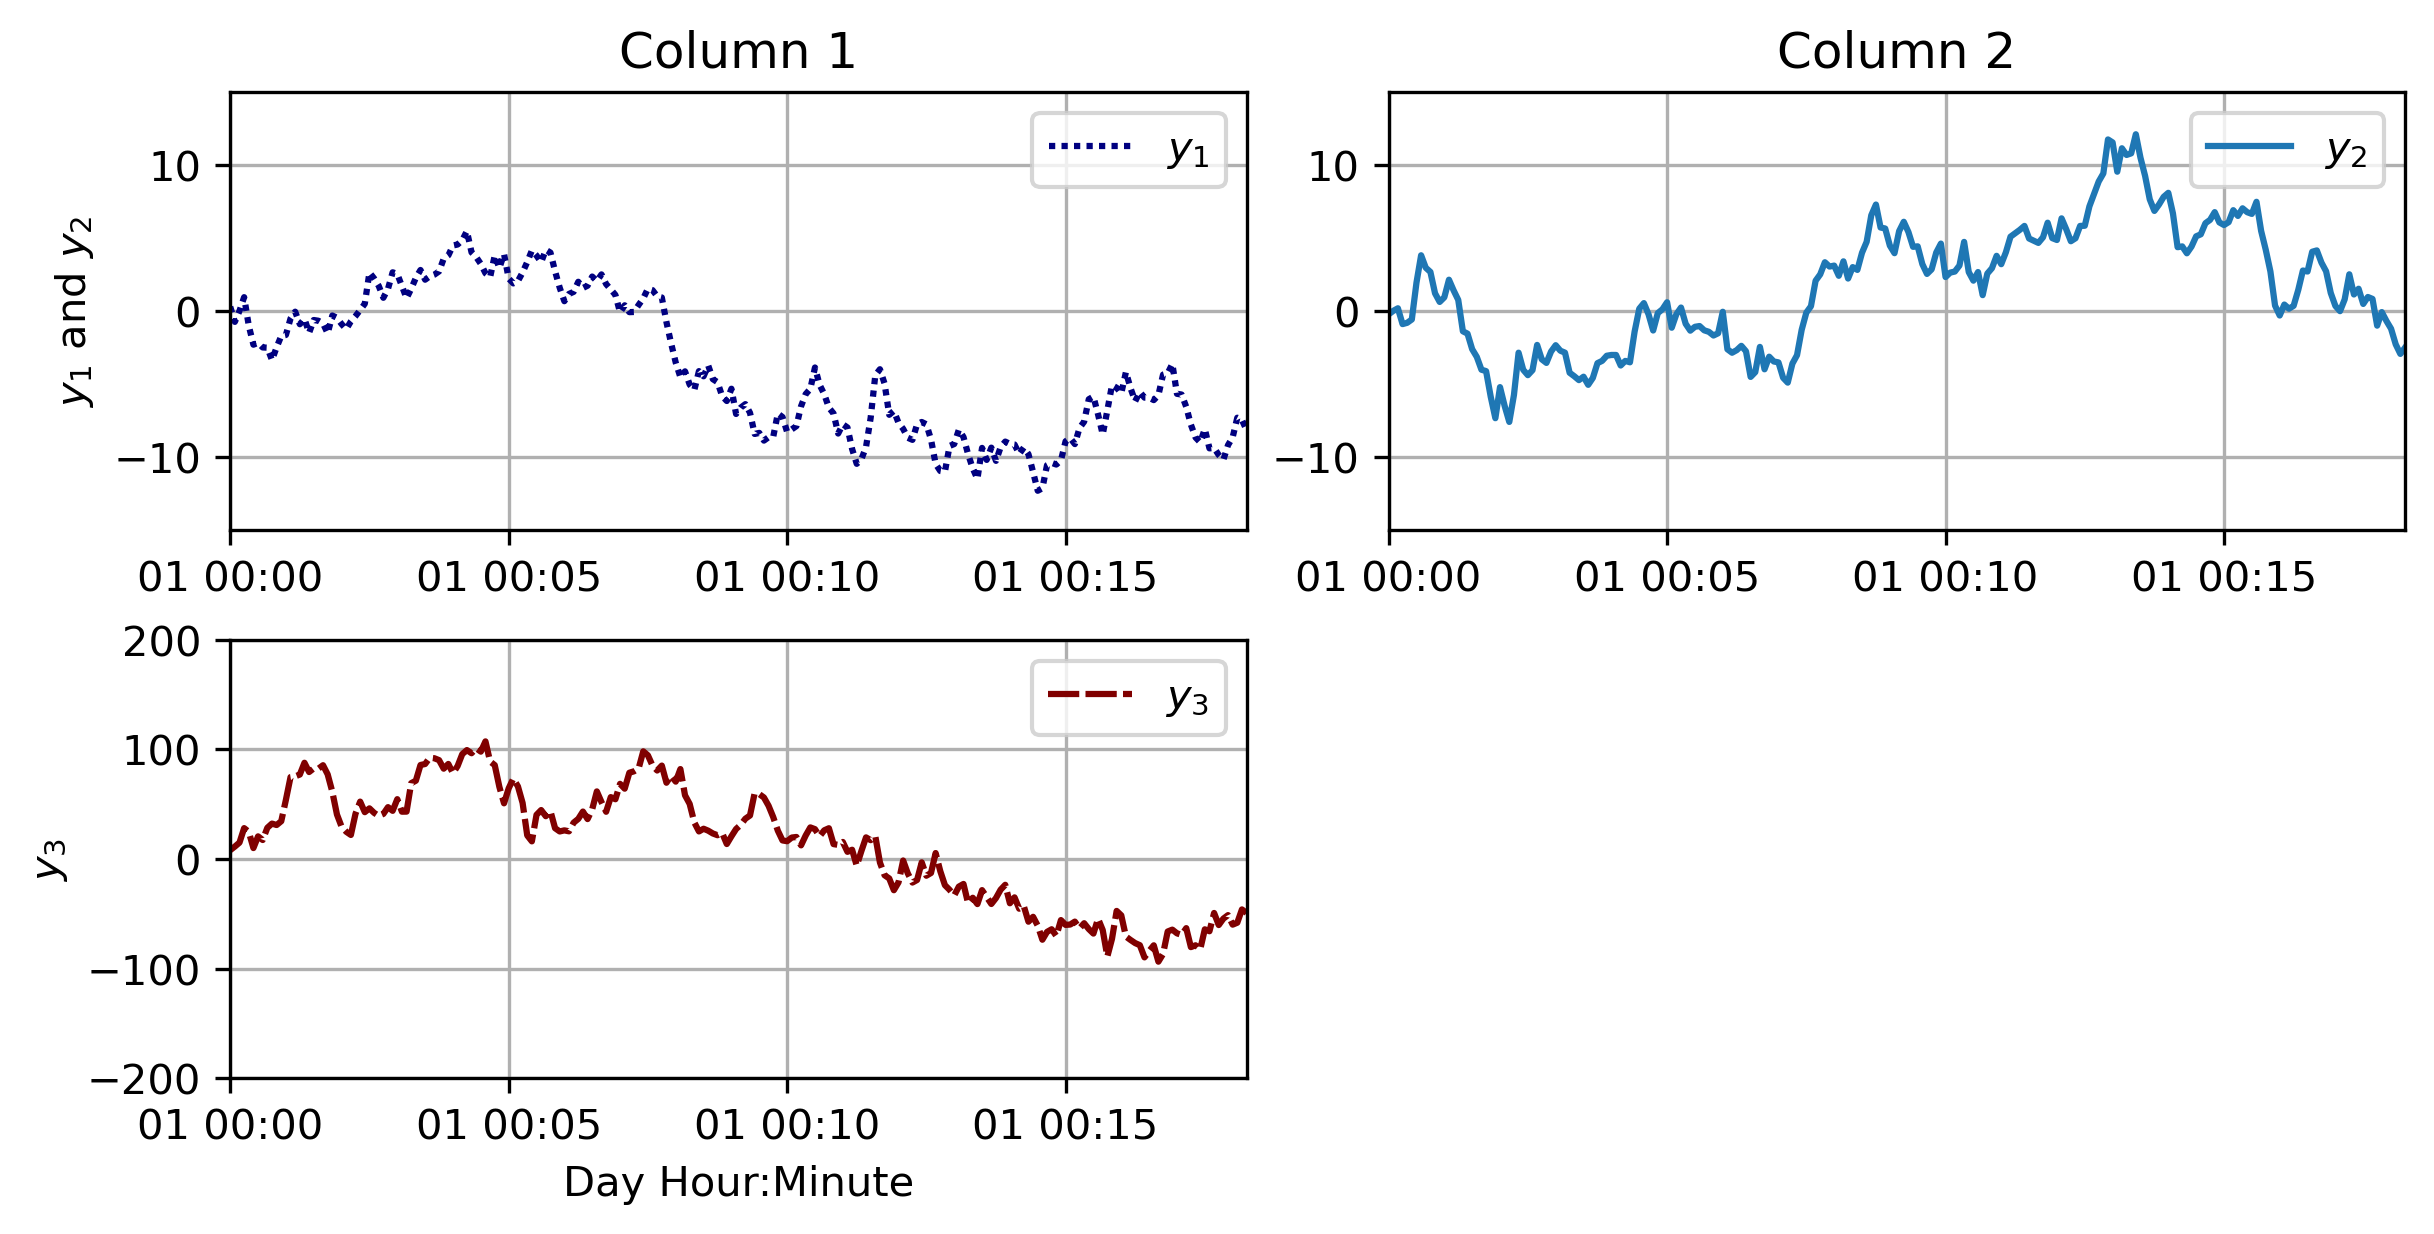

In [16]:
whole_list[-1][-1] = {}
# * Call the single_plotter to generate figure
fig, xaxeslist = single_plotter(whole_list)
for ax in xaxeslist.flat:   # * now we have multi-rows so we need to flatten
                            # * the xaxeslist to iterate.
    # * Here I specify the time format as '%d %H:%M'
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))